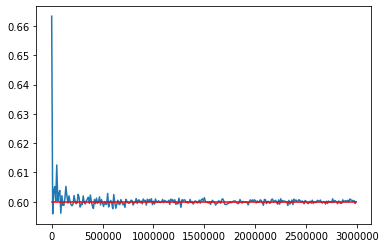

<Figure size 1296x720 with 0 Axes>

RLN is asserted, N=2000100


In [19]:
import scipy.stats as sc
import itertools
import matplotlib.pyplot as plt

# в этой функции подтверждается ЗБЧ
# Слабый закон больших чисел гласит, что среднее значение выборки сходится по вероятности к математическому ожиданию.
def assert_RLN(mean_and_exp_val_eps, lim_eps, distribution, distr_args, min_n=10000, n_step=10000, ns_after_N_limit=100):
    '''
    Надо проверить lim (n -> inf) (P(abs((expected_value - mean) > mean_and_exp_val_eps))) = 0

    т.е. for any lim_eps exists N for any n >= N abs(P - 0) < lim_eps ,
        where P := P(abs((expected_value - mean) > mean_and_exp_val_eps)) = n_count_where_expression_is_True / all_n

    :param mean_and_exp_val_eps: эпсилон для выражения под знаком вероятности
    :param lim_eps: эпсилон для предела
    :param distribution: распределение из scipy
    :param distr_args: аргументы для функций распределения
    :param min_n: с какого n начинать
    :param n_step: сколько прибавлять на каждом шаге к перебору N
    :param ns_after_N_limit: сколько n проверить после нахождения N, ибо в определении предела для любого n >= N
    :return:
    '''
    if mean_and_exp_val_eps <= 0 or lim_eps <= 0:
        print('Eps less or equal than zero!!!')
        return

    n = min_n
    eps_is_smaller_than_differense_results = []
    n_and_means_for_plot = []
    ns_after_N = 0
    N = -1
    while True: # будем бесконечно подбирать N, тк n -> inf
        randints = distribution.rvs(*distr_args, size=n) # рандомим выборку

        mean = randints.mean()
        n_and_means_for_plot.append((n, mean))

        # прибавляем к числовой последовательности новое значение выражения под знаком вероятности
        eps_is_smaller_than_differense_results.append(
            abs(distribution.stats(*distr_args, moments='m') - mean) > mean_and_exp_val_eps)

        # в скольких случаях значение выражения под знаком вероятности верно
        true_assertion_count = len(list(itertools.filterfalse(lambda x: not x, eps_is_smaller_than_differense_results)))
        if true_assertion_count / len(eps_is_smaller_than_differense_results) < lim_eps: # Р < lim_eps
            if N == -1:
                N = n

            ns_after_N += 1

            # проверка нескольких n после N из определения предела
            if ns_after_N >= ns_after_N_limit:
                x = [pair[0] for pair in n_and_means_for_plot]
                y = [pair[1] for pair in n_and_means_for_plot]

                plt.plot(x, y)
                plt.plot(x, [distribution.stats(*distr_args, moments='m')] * len(x), color='r')
                plt.figure(figsize=(18, 10))
                plt.show()

                print('RLN is asserted, N={0}'.format(N))
                return
        else:
            ns_after_N = 0
            N = -1

        n += n_step



eps = pow(10, -2)
mu = 0.6

assert_RLN(eps, eps, sc.gamma, [mu], 100)
